In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Load the CSV file
file_path = './results/local/speedup.csv'  
data = pd.read_csv(file_path)   

ParserError: Error tokenizing data. C error: Expected 6 fields in line 29, saw 7


In [ ]:
# Calculate Scalability and Efficiency
scalability = []
efficiency = []

# Assuming the sequential method is labeled as 'seq'
sequential_times = data[data['method'] == 'seq'].set_index(['method', 'size', 'on-demand'])['time']
print(sequential_times)

for index, row in data.iterrows():
    method, size, w, on_demand, time = row['method'], row['size'], row['#w'], row['on-demand'], row['time']
    
    if w >= 1:
        seq_time = sequential_times.get(('seq', size), None)
        print(seq_time)
        
        if seq_time is not None:
            # Scalability: time of the sequential method / time of the parallel method
            scale = seq_time / time
            scalability.append(scale)
            
            # Efficiency: (sequential method time / #w) / parallel time
            eff = (seq_time / w) / time
            efficiency.append(eff)
        else:
            scalability.append(None)
            efficiency.append(None)
    else:
        scalability.append(None)
        efficiency.append(None)

# Add the new columns to the dataframe
data['scalability'] = scalability
data['efficiency'] = efficiency

# Plotting
for metric in ['scalability', 'efficiency']:
    plt.figure(figsize=(10, 6))
    for method in data['method'].unique():
        if method != 'seq':  # Exclude the sequential method from the plot
            subset = data[(data['method'] == method) & (data['#w'] >= 1)]
            plt.plot(subset['#w'], subset[metric], marker='o', label=method)
        
    plt.title(f'{metric.capitalize()} vs Number of Workers (#w)')
    plt.xlabel('Number of Workers (#w)')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()


In [6]:
# Filter data by method
seq_data = data[data['method'] == 'seq']
farm_data = data[data['method'] == 'frm']
par_data = data[data['method'] == 'par']


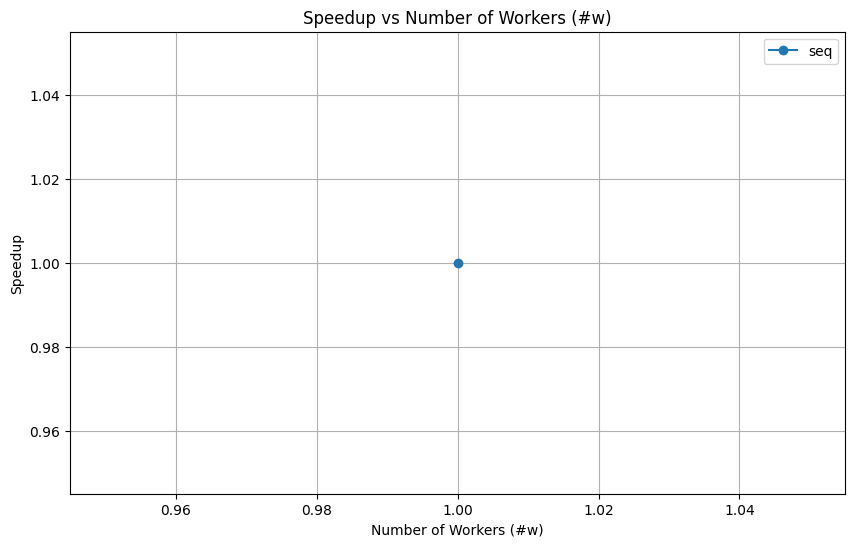

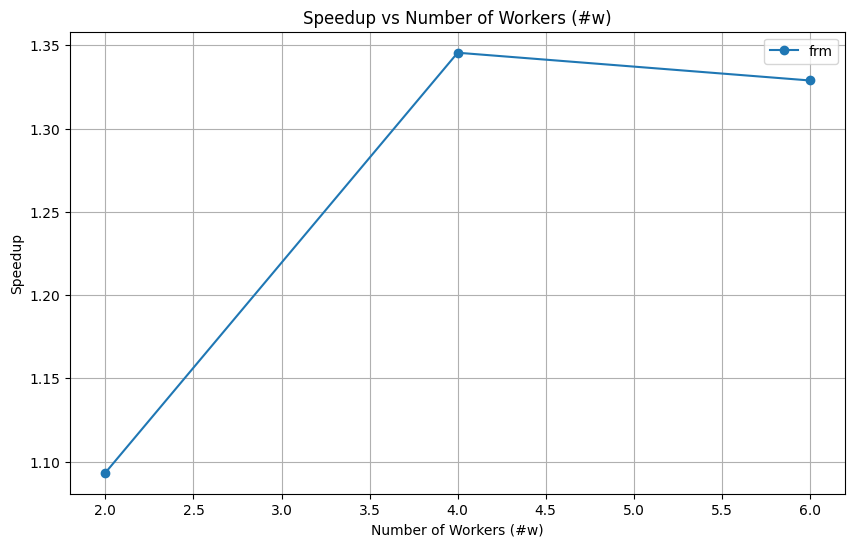

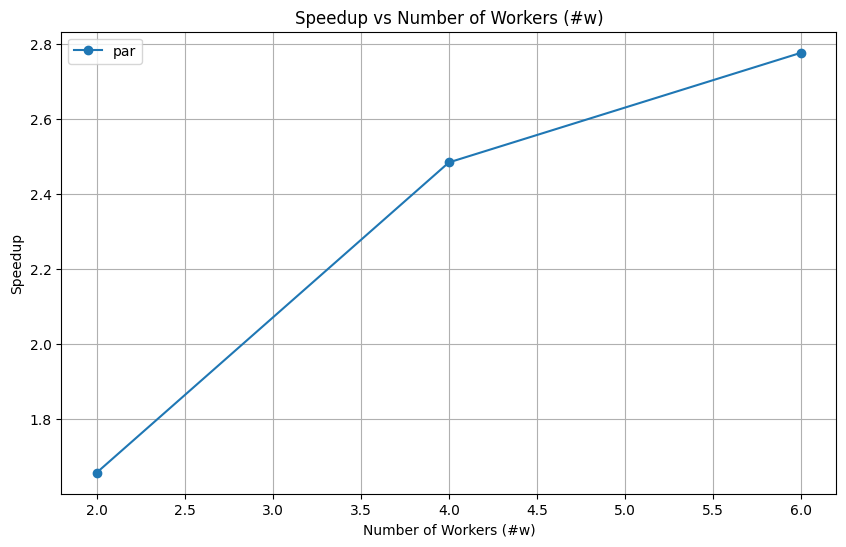

In [14]:
#"method,size,#w,on-demand,time,speedup,efficiency"
# for each method, plot the speedup vs #w, if more than one value is present for the same #w, plot the average
for method in data['method'].unique():
    plt.figure(figsize=(10, 6))
    subset = data[data['method'] == method]
    subset = subset.groupby('#w').agg({'speedup': 'mean'}).reset_index()
    plt.plot(subset['#w'], subset['speedup'], marker='o', label=method)
    plt.title(f'Speedup vs Number of Workers (#w)')
    plt.xlabel('Number of Workers (#w)')
    plt.ylabel('Speedup')
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [15]:
# for each method, plot the efficiency vs #w, if more than one value is present for the same #w, plot the average
for method in data['method'].unique():
    plt.figure(figsize=(10, 6))
    subset = data[data['method'] == method]
    subset = subset.groupby('#w').agg({'efficiency': 'mean'}).reset_index()
    plt.plot(subset['#w'], subset['efficiency'], marker='o', label=method)
    plt.title(f'Efficiency vs Number of Workers (#w)')
    plt.xlabel('Number of Workers (#w)')
    plt.ylabel('Efficiency')
    plt.legend()
    plt.grid(True)
    plt.show()

TypeError: agg function failed [how->mean,dtype->object]

<Figure size 1000x600 with 0 Axes>